<a href="https://colab.research.google.com/github/abinaya-p/TNSDC-Project/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import clear_output
!pip install -q tensorflow==2.4.1
clear_output()

In [2]:
! pip install segmentation-models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.5 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
DATASET_DIR = "/content/drive/MyDrive/DRIVE"
TRAIN_DATA_DIR = os.path.join(DATASET_DIR, "/content/drive/MyDrive/DRIVE/training/image")
TRAIN_MASK_DIR = os.path.join(DATASET_DIR, "/content/drive/MyDrive/DRIVE/training/mask1")
TEST_DATA_DIR = os.path.join(DATASET_DIR, "/content/drive/MyDrive/DRIVE/test/image")
TEST_MASK_DIR = os.path.join(DATASET_DIR, "/content/drive/MyDrive/DRIVE/test/mask1-20231011T142514Z-001/mask1")

In [6]:
import os
print(sorted(os.listdir(TRAIN_DATA_DIR))[:5])
print(sorted(os.listdir(TRAIN_MASK_DIR))[:5])

print(len(os.listdir(TRAIN_DATA_DIR)))
print(len(os.listdir(TRAIN_MASK_DIR)))

print(sorted(os.listdir(TEST_DATA_DIR))[:5])
print(sorted(os.listdir(TEST_MASK_DIR))[:5])

print(len(os.listdir(TEST_DATA_DIR)))
print(len(os.listdir(TEST_MASK_DIR)))

['21_training.png', '22_training.png', '23_training.png', '24_training.png', '25_training.png']
['21_training_mask.png', '22_training_mask.png', '23_training_mask.png', '24_training_mask.png', '25_training_mask.png']
20
20
['21_training.png', '22_training.png', '23_training.png', '24_training.png', '25_training.png']
['21_training_mask.png', '22_training_mask.png', '23_training_mask.png', '24_training_mask.png', '25_training_mask.png']
20
20


(584, 565, 3)
uint8
(584, 565)
uint8


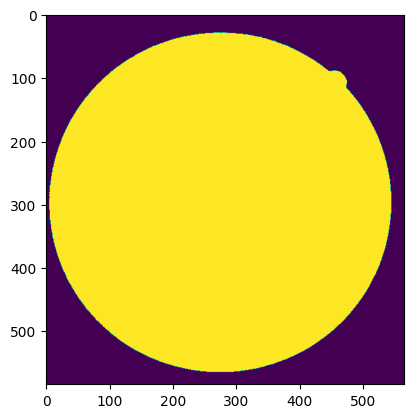

In [7]:
# inspect a sample
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample_image = mpimg.imread(os.path.join(TRAIN_DATA_DIR,'/content/drive/MyDrive/DRIVE/training/images/22_training.tif'))
plt.imshow(sample_image)
print(sample_image.shape)
print(sample_image.dtype)
sample_mask = mpimg.imread(os.path.join(TRAIN_MASK_DIR, '/content/drive/MyDrive/DRIVE/training/mask/24_training_mask.gif'))
plt.imshow(sample_mask)
print(sample_mask.shape)
print(sample_mask.dtype)

In [8]:
train_image_list = sorted(os.listdir(TRAIN_DATA_DIR))
train_mask_list = sorted(os.listdir(TRAIN_MASK_DIR))

test_image_list = sorted(os.listdir(TEST_DATA_DIR))
test_mask_list = sorted(os.listdir(TEST_MASK_DIR))
# print(len(train_image_list))
# print(len(train_mask_list))
# print(len(os.listdir(TRAIN_DATA_DIR)))
# print(len(os.listdir(TRAIN_MASK_DIR)))

train_image_path_list = [ os.path.join(TRAIN_DATA_DIR, x) for x in train_image_list]
train_mask_path_list = [ os.path.join(TRAIN_MASK_DIR, x) for x in train_mask_list]

test_image_path_list = [os.path.join(TEST_DATA_DIR, x) for x in test_image_list]
test_mask_path_list = [os.path.join(TEST_MASK_DIR, x) for x in test_mask_list]

print(train_image_path_list[:5])
print(train_mask_path_list[:5])
print(test_image_path_list[:5])
print(test_mask_path_list[:5])
# image_list = [image_path+i for i in image_list]
# mask_list = [mask_path+i for i in mask_list]
print(len(train_image_path_list))
print(len(train_mask_path_list))
print(len(test_image_path_list))
print(len(test_mask_path_list))

['/content/drive/MyDrive/DRIVE/training/image/21_training.png', '/content/drive/MyDrive/DRIVE/training/image/22_training.png', '/content/drive/MyDrive/DRIVE/training/image/23_training.png', '/content/drive/MyDrive/DRIVE/training/image/24_training.png', '/content/drive/MyDrive/DRIVE/training/image/25_training.png']
['/content/drive/MyDrive/DRIVE/training/mask1/21_training_mask.png', '/content/drive/MyDrive/DRIVE/training/mask1/22_training_mask.png', '/content/drive/MyDrive/DRIVE/training/mask1/23_training_mask.png', '/content/drive/MyDrive/DRIVE/training/mask1/24_training_mask.png', '/content/drive/MyDrive/DRIVE/training/mask1/25_training_mask.png']
['/content/drive/MyDrive/DRIVE/test/image/21_training.png', '/content/drive/MyDrive/DRIVE/test/image/22_training.png', '/content/drive/MyDrive/DRIVE/test/image/23_training.png', '/content/drive/MyDrive/DRIVE/test/image/24_training.png', '/content/drive/MyDrive/DRIVE/test/image/25_training.png']
['/content/drive/MyDrive/DRIVE/test/mask1-20231

In [9]:
import tensorflow as tf
import os

# Replace 'path_to_image_directory' and 'path_to_mask_directory' with your directory paths.
image_directory = '/content/drive/MyDrive/DRIVE/training/image'
mask_directory = '/content/drive/MyDrive/DRIVE/training/mask1'

# List image and mask filenames from the directories.
train_image_filenames = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory)]
train_mask_filenames = [os.path.join(mask_directory, filename) for filename in os.listdir(mask_directory)]

# Load image and mask data from filenames
train_images = [tf.io.read_file(filename) for filename in train_image_filenames]
train_masks = [tf.io.read_file(filename) for filename in train_mask_filenames]

# Create a dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_masks))

# You may need to preprocess the images and masks using appropriate functions.


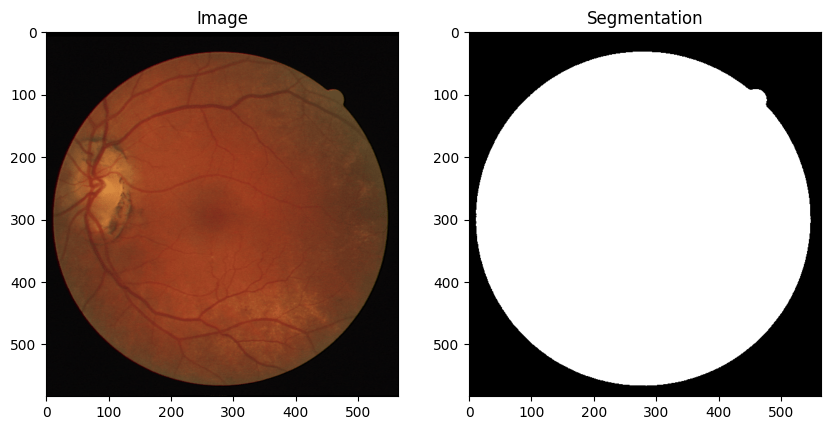

In [10]:
idx = 5
img = mpimg.imread(train_image_path_list[idx])
mask = mpimg.imread(train_mask_path_list[idx])
#mask = np.array([max(mask[i, j]) for i in range(mask.shape[0]) for j in range(mask.shape[1])]).reshape(img.shape[0], img.shape[1])

fig, arr = plt.subplots(1, 2, figsize=(10, 6))
arr[0].imshow(img)
arr[0].set_title('Image')
arr[1].imshow(mask)
arr[1].set_title('Segmentation')
train_image_list_ds = tf.data.Dataset.list_files(train_image_path_list, shuffle=False)
train_mask_list_ds = tf.data.Dataset.list_files(train_mask_path_list, shuffle=False)

test_image_list_ds = tf.data.Dataset.list_files(test_image_path_list, shuffle=False)
test_mask_list_ds = tf.data.Dataset.list_files(test_mask_path_list, shuffle=False)

# for path in zip(train_image_list_ds.take(3), train_mask_list_ds.take(3)):
#     print(path)
train_image_filenames = tf.constant(train_image_path_list)
train_mask_filenames = tf.constant(train_mask_path_list)

test_image_filenames = tf.constant(test_image_path_list)
test_mask_filenames = tf.constant(test_mask_path_list)

train_dataset = tf.data.Dataset.from_tensor_slices((train_image_filenames, train_mask_filenames))
test_dataset = tf.data.Dataset.from_tensor_slices((test_image_filenames, test_mask_filenames))


# for image, mask in dataset.take(3):
#     print(image)
#     print(mask)
#     print()

In [11]:
!pip show pillow

Name: Pillow
Version: 9.4.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.org
Author: Alex Clark (PIL Fork Author)
Author-email: aclark@python-pillow.org
License: HPND
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: bokeh, dopamine-rl, fastai, imageio, imgaug, matplotlib, scikit-image, torchvision, wordcloud


In [12]:
!pip install pillow


In [13]:
!pip3 install pillow

In [14]:
import tensorflow as tf

# Define a function to preprocess images (you should replace this with your actual preprocessing logic).
def preprocess_image(image):
    # Your preprocessing code here
    return image

# Assuming you have a TensorFlow dataset called train_dataset (you should replace this with your actual dataset).
# You can apply preprocessing to this dataset using the `map` function.
train_processed_image_ds = train_dataset.map(lambda image, mask: (preprocess_image(image), mask))

# Now you can iterate over the `train_processed_image_ds` dataset.
for image, mask in train_processed_image_ds.take(1):
    print(image.shape)
    print(image.dtype)
    print(mask.shape)
    print(mask.dtype)


()
<dtype: 'string'>
()
<dtype: 'string'>


In [15]:
for image, mask in train_processed_image_ds.take(1):
    print(image.shape)
    print(image.dtype)
    print(mask.shape)
    print(mask.dtype)

()
<dtype: 'string'>
()
<dtype: 'string'>


In [16]:
def process_path(image_path, mask_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=3)
    mask = tf.math.reduce_max(mask, axis=-1, keepdims=True)
    return img, mask

def preprocess(image, mask):
    input_image = tf.image.resize(image, (224, 224), method='nearest')
    input_mask = tf.image.resize(mask, (224, 224), method='nearest')

    input_image = input_image / 255.
    input_mask = input_mask / 255

#     print(input_image.dtype)
#     print(input_mask.dtype)
    return input_image, input_mask

train_image_ds = train_dataset.map(process_path)
train_processed_image_ds = train_image_ds.map(preprocess)

test_image_ds = test_dataset.map(process_path)
test_processed_image_ds = test_image_ds.map(preprocess)



In [17]:
for image, mask in train_processed_image_ds.take(1):
    print(image.shape)
    print(image.dtype)
    print(mask.shape)
    print(mask.dtype)

(224, 224, 3)
<dtype: 'float32'>
(224, 224, 1)
<dtype: 'float32'>


In [18]:
from tensorflow.keras.layers import Conv2D, Dense, Conv2DTranspose, MaxPooling2D, Concatenate
from tensorflow.keras import Input, Model
def create_U_Net(input_shape=(224,224,3)):
    inputs = Input(shape=input_shape)

    # Downward part
    x1 = Conv2D(filters= 64, kernel_size= (3,3), strides= 1, padding= "same" , activation="relu")(inputs)
    x1 = Conv2D(filters= 64, kernel_size= (3,3), strides= 1, padding= "same" , activation="relu")(x1)

    # Downward part
    x2 = MaxPooling2D(pool_size=(2, 2), strides=2)(x1)
    x2 = Conv2D(filters= 128, kernel_size= (3,3), strides= 1, padding= "same" , activation="relu")(x2)
    x2 = Conv2D(filters= 128, kernel_size= (3,3), strides= 1, padding= "same" , activation="relu")(x2)

    # Downward part
    x3 = MaxPooling2D(pool_size=(2, 2), strides=2)(x2)
    x3 = Conv2D(filters= 256, kernel_size= (3,3), strides= 1, padding= "same" , activation="relu")(x3)
    x3 = Conv2D(filters= 256, kernel_size= (3,3), strides= 1, padding= "same" , activation="relu")(x3)

    # Downward part
    x4 = MaxPooling2D(pool_size=(2, 2), strides=2)(x3)
    x4 = Conv2D(filters= 512, kernel_size= (3,3), strides= 1, padding= "same" , activation="relu")(x4)
    x4 = Conv2D(filters= 512, kernel_size= (3,3), strides= 1, padding= "same" , activation="relu")(x4)

    # Downward part
    x5 = MaxPooling2D(pool_size=(2, 2), strides=2)(x4)
    x5 = Conv2D(filters= 1024, kernel_size= (3,3), strides= 1, padding= "same" , activation="relu")(x5)
    x5 = Conv2D(filters= 1024, kernel_size= (3,3), strides= 1, padding= "same" , activation="relu")(x5)

    # Upward part
    x6 = Conv2DTranspose(filters=512, kernel_size = (3,3), strides=(2,2), padding="same", activation="relu")(x5)
    x6 = Concatenate(axis=3)([x4, x6])
    x6 = Conv2D(filters=512, kernel_size = (3,3), strides=1, padding="same", activation="relu")(x6)
    x6 = Conv2D(filters=512, kernel_size = (3,3), strides=1, padding="same", activation="relu")(x6)

    # Upward part
    x7 = Conv2DTranspose(filters=256, kernel_size = (3,3), strides=(2,2), padding="same", activation="relu")(x6)
    x7 = Concatenate(axis=3)([x3, x7])
    x7 = Conv2D(filters=256, kernel_size = (3,3), strides=1, padding="same", activation="relu")(x7)
    x7 = Conv2D(filters=256, kernel_size = (3,3), strides=1, padding="same", activation="relu")(x7)

    # Upward part
    x8 = Conv2DTranspose(filters=128, kernel_size = (3,3), strides=(2,2), padding="same", activation="relu")(x7)
    x8 = Concatenate(axis=3)([x2, x8])
    x8 = Conv2D(filters=128, kernel_size = (3,3), strides=1, padding="same", activation="relu")(x8)
    x8 = Conv2D(filters=128, kernel_size = (3,3), strides=1, padding="same", activation="relu")(x8)

    # Upward part
    x9 = Conv2DTranspose(filters=64, kernel_size = (3,3), strides=(2,2), padding="same", activation="relu")(x8)
    x9 = Concatenate(axis=3)([x1, x9])
    x9 = Conv2D(filters=64, kernel_size = (3,3), strides=1, padding="same", activation="relu")(x9)
    x9 = Conv2D(filters=64, kernel_size = (3,3), strides=1, padding="same", activation="relu")(x9)

    # Classification
    outputs = Conv2D(filters=1, kernel_size = (1,1), activation='sigmoid')(x9)

    model = Model(inputs=inputs, outputs=outputs)
    return model

my_unet = create_U_Net()
my_unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 224, 224, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 224, 224, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)         0         ['conv2d_1[0][0]']            
 D)                                                                                           

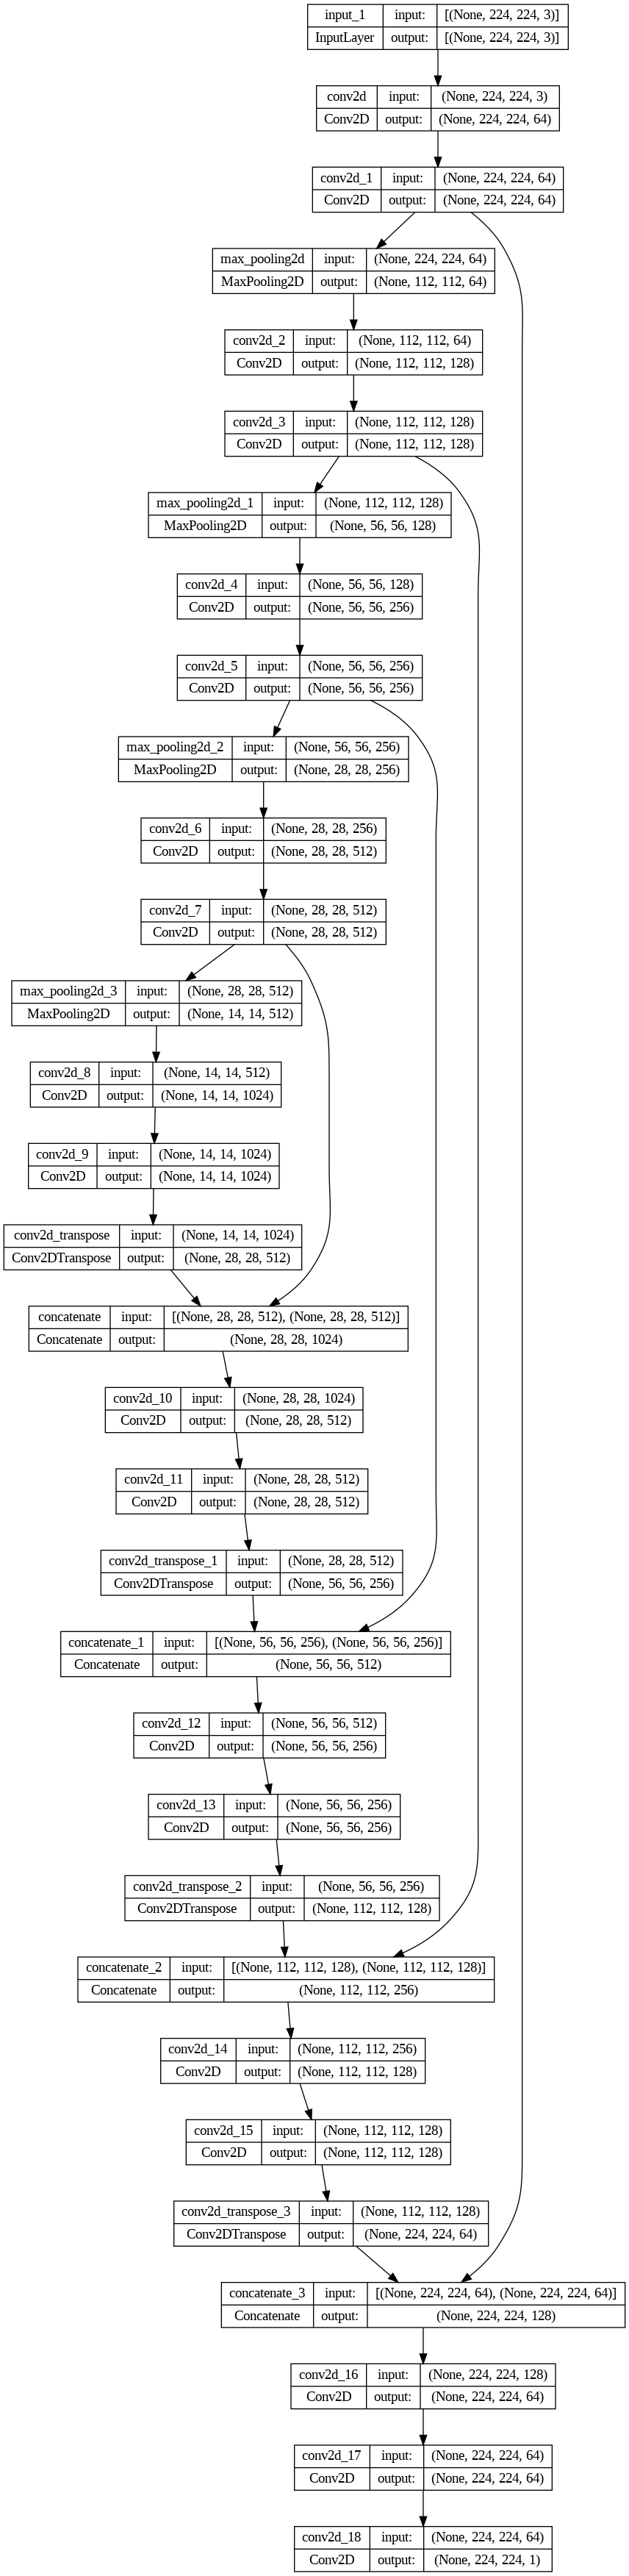

In [19]:
import tensorflow as tf
tf.keras.utils.plot_model(
    my_unet,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96
)

In [20]:
import tensorflow.keras.backend as K
#Keras
def dice_loss(targets, inputs, smooth=1e-6):

    #flatten label and prediction tensors
    inputs = K.flatten(inputs)
    targets = K.flatten(targets) #tf.keras.layers.Flatten()

    intersection = K.sum(K.dot(targets, inputs))
    dice = (2*intersection + smooth) / (K.sum(targets) + K.sum(inputs) + smooth)
    return 1 - dice
#Keras
def dice_score(targets, inputs, smooth=1e-6):

    #flatten label and prediction tensors
    inputs = K.flatten(inputs) #tf.keras.layers.Flatten()
    targets = K.flatten(targets)

    intersection = K.sum(K.dot(targets, inputs))
    dice = (2*intersection + smooth) / (K.sum(targets) + K.sum(inputs) + smooth)
    return dice

In [21]:
import tensorflow.keras.backend as K

def dice_coef(y_true, y_pred):
    y_truef=K.flatten(y_true)
    y_predf=K.flatten(y_pred)
    And=K.sum(y_truef* y_predf)
    return((2* And + 1e-6) / (K.sum(y_truef) + K.sum(y_predf) + 1e-6))

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [22]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()


(584, 565, 1)


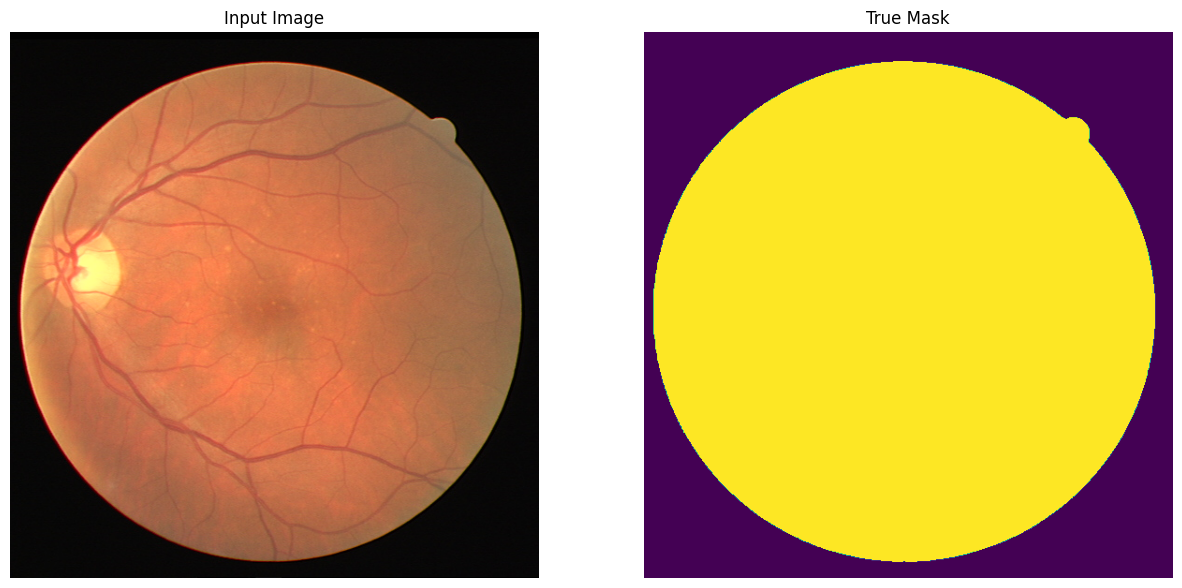

In [23]:
for image, mask in train_image_ds.take(1):
    sample_image, sample_mask = image, mask
    print(mask.shape)
display([sample_image, sample_mask])

(224, 224, 1)


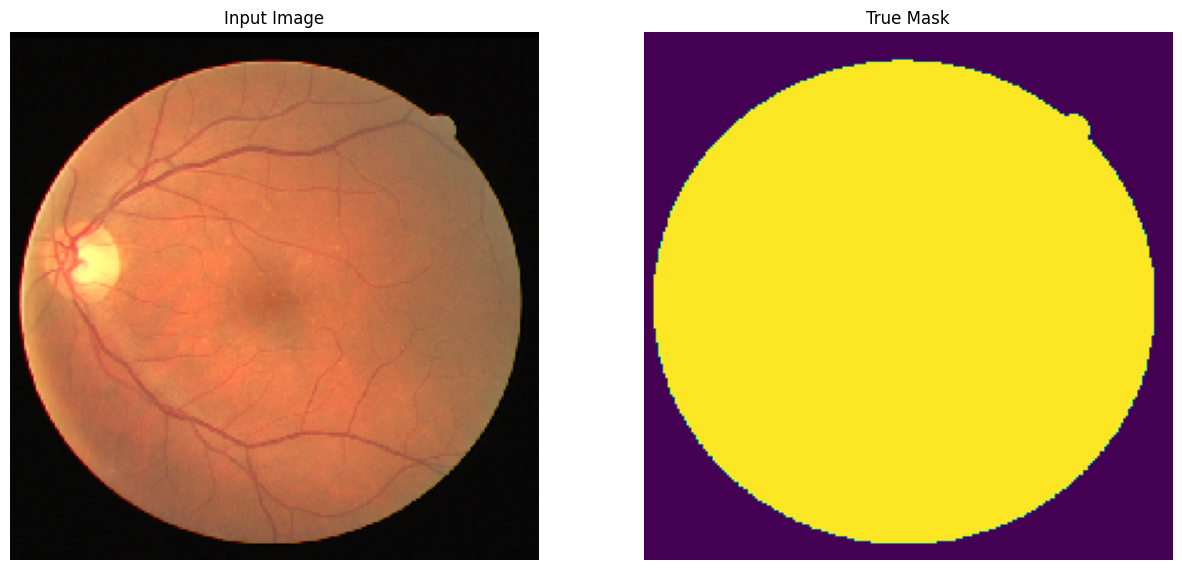

In [24]:
for image, mask in train_processed_image_ds.take(1):
    sample_image, sample_mask = image, mask
    print(mask.shape)
display([sample_image, sample_mask])

(224, 224, 1)


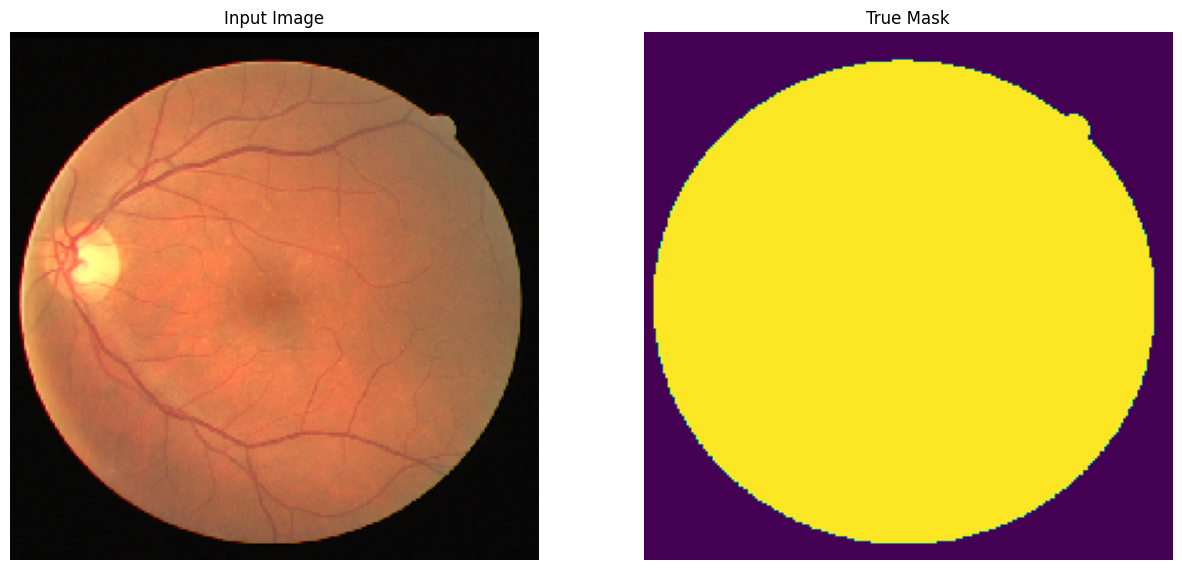

In [25]:
for image, mask in test_processed_image_ds.take(1):
    sample_image, sample_mask = image, mask
    print(mask.shape)
display([sample_image, sample_mask])

In [26]:
# unet.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), #dice_coef_loss
#               metrics="accuracy") #dice_coef

my_unet.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), #dice_coef_loss
              metrics="accuracy") #dice_coef
EPOCHS = 30
BUFFER_SIZE = 32
BATCH_SIZE = 32

# train_processed_image_ds.batch(BATCH_SIZE)
# test_processed_image_ds.batch(BATCH_SIZE)

train_dataset = train_processed_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_processed_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

print(train_processed_image_ds.element_spec)
print(test_processed_image_ds.element_spec)


(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(224, 224, 1), dtype=tf.float32, name=None))
(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(224, 224, 1), dtype=tf.float32, name=None))


In [ ]:
# model_history = unet.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset, verbose=1)
model_history = my_unet.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset, verbose=1)

Epoch 1/30
1/1 [==============================] - 138s 138s/step - loss: 0.6932 - accuracy: 0.1765 - val_loss: 0.6920 - val_accuracy: 0.6880
Epoch 2/30
1/1 [==============================] - 139s 139s/step - loss: 0.6920 - accuracy: 0.6880 - val_loss: 0.6892 - val_accuracy: 0.6880
Epoch 3/30
1/1 [==============================] - 123s 123s/step - loss: 0.6892 - accuracy: 0.6880 - val_loss: 0.6849 - val_accuracy: 0.6880
Epoch 4/30
1/1 [==============================] - 121s 121s/step - loss: 0.6849 - accuracy: 0.6880 - val_loss: 0.6768 - val_accuracy: 0.6880
Epoch 5/30
1/1 [==============================] - 123s 123s/step - loss: 0.6768 - accuracy: 0.6880 - val_loss: 0.6584 - val_accuracy: 0.6880
Epoch 6/30
1/1 [==============================] - 137s 137s/step - loss: 0.6584 - accuracy: 0.6880 - val_loss: 0.6003 - val_accuracy: 0.6880
Epoch 7/30
1/1 [==============================] - 127s 127s/step - loss: 0.6003 - accuracy: 0.6880 - val_loss: 1.9290 - val_accuracy: 0.6880
Epoch 8/30
1/

In [ ]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["loss"])

In [ ]:
evaluation_results = my_unet.evaluate(test_dataset)
print("test loss, test acc:", evaluation_results)

In [ ]:
def create_mask(pred_mask):
    pred_mask = tf.round(pred_mask)
#     pred_mask = tf.argmax(pred_mask, axis=-1)
#     pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]
def show_predictions(dataset=None, num=1):
    """
    Displays the first image of each of the num batches
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = my_unet.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
             create_mask(unet.predict(sample_image[tf.newaxis, ...]))])
# for image, mask in train_dataset.take(1):
# #     plt.imshow(image[0]*255.0)
#     pred_mask = unet.predict(image)
# #     print(pred_mask[0].shape)
# #     print(pred_mask[0].dtype)
#     plt.imshow(pred_mask[0])
# #     plt.imshow(pred_mask*255.0)
show_predictions(train_dataset, 10)

In [ ]:
!pip install --upgrade keras


In [ ]:
!pip install --upgrade segmentation-models


In [ ]:
!pip install keras==2.2.4


In [ ]:
!pip install keras==2.3.1
